In [1]:
import pandas
import os
import numpy
from scipy.interpolate import interp1d
import datetime
import matplotlib.pyplot as plt
import aacgmv2
from davitpy.utils.coordUtils import coord_conv
from davitpy import utils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def convert_aacgm_geo(row, a2g=False):
    """
    For the SSUSI DF convert all the 42
    Given glat, glon and date return
    mlat, mlon and mlt
    """
    for i in range( row["shapeArr"] ):
        indStr = str(i+1)
        if a2g:
            glat, glon = aacgmv2.convert(row["mlat." + indStr], row["mlon." + indStr],\
                           300, row["date"], a2g=a2g)
            row["glat." + indStr] = numpy.round( glat, 2)
            row["glon." + indStr] = numpy.round( glon, 2)
        else:
            mlat, mlon = aacgmv2.convert(row["glat." + indStr], row["glon." + indStr],\
                               300, row["date"])
            mlt = aacgmv2.convert_mlt(mlon, row["date"], m2a=False)
            row["mlat." + indStr] = numpy.round( mlat, 2)
            row["mlon." + indStr] = numpy.round( mlon, 2)
            row["mlt." + indStr] = numpy.round( mlt, 2)
    return row

In [3]:
def convert_new_mlt(row, a2g=False):
    """
    For the SSUSI DF convert all the 42
    Given glat, glon and date return
    mlat, mlon and mlt
    """
    for i in range( row["shapeArr"] ):
        indStr = str(i+1)
        if a2g:
            glat, glon = aacgmv2.convert(row["mlat." + indStr], row["mlon." + indStr],\
                           300, row["date"], a2g=a2g)
            row["glat." + indStr] = numpy.round( glat, 2)
            row["glon." + indStr] = numpy.round( glon, 2)
        else:
            # convert from geo to mlt degress
            mlt, mlat = coord_conv(row["mlon." + indStr], row["mlat." + indStr], "mag", "mlt",
                                                   altitude=300.,
                                                    date_time=row["date"])
            row["nnn." + indStr] = numpy.round( mlt, 2)
            row["xxx." + indStr] = numpy.round( mlat, 2)
    return row

In [4]:
inpDir = "/home/bharat/Documents/code/data/timed-prcsd/"
fileDate = datetime.datetime( 2002, 3, 18 )
inpTime = datetime.datetime( 2002, 3, 18, 16, 30 )
coords="mlt"
timeDelta = 40.

currFname = inpDir + fileDate.strftime("%Y%m%d") + ".txt"
timedDF = pandas.read_csv(\
                 currFname, delim_whitespace=True,\
                infer_datetime_format=True,\
                parse_dates=["date"] )
timeMin = inpTime - datetime.timedelta(minutes=timeDelta)
timeMax = inpTime + datetime.timedelta(minutes=timeDelta)
# Choose DF rows which lie between timeMin and timeMax
timedDF = timedDF[ (timedDF["date"] >= timeMin) &\
                    (timedDF["date"] <= timeMax) ]
timedDF = timedDF.apply(convert_aacgm_geo, args=(False,), axis=1)

In [5]:
timedLats = timedDF\
                [timedDF.columns[pandas.Series(\
                timedDF.columns).str.startswith('mlat')\
                ]].values
timedLons = timedDF\
                [timedDF.columns[pandas.Series(\
                timedDF.columns).str.startswith('mlon')\
                ]].values
timedMlts = timedDF\
                [timedDF.columns[pandas.Series(\
                timedDF.columns).str.startswith('mlt')\
                ]].values
timedDisk = timedDF\
                [timedDF.columns[pandas.Series(\
                timedDF.columns).str.startswith('d135')\
                ]].values
    
    
    

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


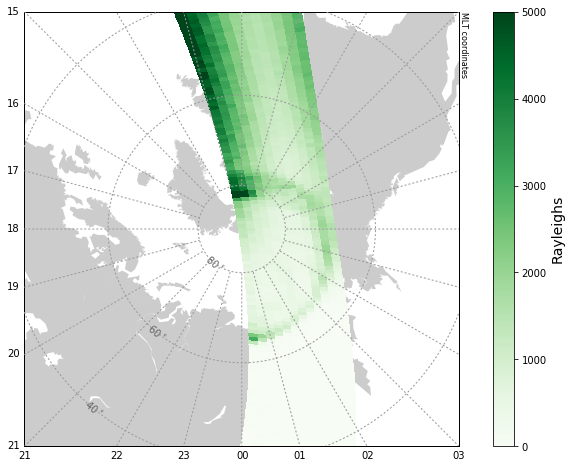

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
mapHandle = utils.plotUtils.mapObj(boundinglat=40., coords=coords, lat_0=90., lon_0=0, datetime=inpTime)
vmin = 0.
vmax = 5000.
xVecs, yVecs = mapHandle(timedMlts*15., timedLats, coords=coords)
# ssusiPlot = mapHandle.scatter(xVecs, yVecs, c=timedDisk, s=50.,\
#                        cmap="Greens", alpha=0.7, zorder=5., \
#                                  edgecolor='none', marker="s",\
#                                   vmin=vmin, vmax=vmax)
ssusiPlot = mapHandle.pcolormesh(xVecs, yVecs,\
            timedDisk,\
            zorder=1.9,
            vmin=0, vmax=vmax,
            ax=ax, alpha=1, cmap='Greens')
cbar = plt.colorbar(ssusiPlot, orientation='vertical')
cbar.set_label('Rayleighs', size=14)

In [7]:
print timedMlts

[[ 17.88  17.95  18.   ...,  18.22  18.24  18.26]
 [ 18.32  18.31  18.31 ...,  18.36  18.37  18.39]
 [ 18.76  18.67  18.62 ...,  18.5   18.51  18.51]
 ..., 
 [ 12.38  12.48  12.58 ...,  13.38  13.48  13.59]
 [ 12.4   12.5   12.6  ...,  13.4   13.5   13.61]
 [ 12.42  12.52  12.62 ...,  13.42  13.52  13.63]]


In [8]:
print timedMlts

[[ 17.88  17.95  18.   ...,  18.22  18.24  18.26]
 [ 18.32  18.31  18.31 ...,  18.36  18.37  18.39]
 [ 18.76  18.67  18.62 ...,  18.5   18.51  18.51]
 ..., 
 [ 12.38  12.48  12.58 ...,  13.38  13.48  13.59]
 [ 12.4   12.5   12.6  ...,  13.4   13.5   13.61]
 [ 12.42  12.52  12.62 ...,  13.42  13.52  13.63]]
